In [319]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
from mdptoolbox.mdp import PolicyIterationModified, ValueIteration, QLearning
from mdptoolbox.example import forest
import pandas as pd
import time

In [ ]:
def argmax_rand(arr):
    return np.random.choice(np.flatnonzero(arr == np.max(arr)))

In [9]:
size = 500
T, R = forest(S=size)

In [22]:
gammas = np.arange(0.1, 1.0, 0.05)

In [35]:
pi_frames = []
vi_frames = []
for g in gammas:
    vi = ValueIteration(T, R, g)
    vi.run()
    _frame = pd.DataFrame({"max_value": max(vi.V),
                          "run_time": vi.time,
                          "iters": vi.iter}, index=[g])
    pi_frames.append(_frame)
    pi = PolicyIterationModified(T, R, g)
    pi.run()
    _frame = pd.DataFrame({"max_value": max(pi.V),
                          "run_time": pi.time,
                          "iters": pi.iter}, index=[g])
    vi_frames.append(_frame)
pi_df = pd.concat(pi_frames)
vi_df = pd.concat(vi_frames)

In [36]:
cols = pi_df.columns

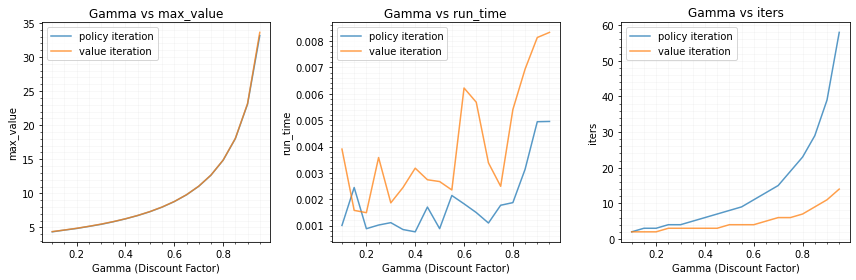

In [37]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=len(cols))
for i, col in enumerate(cols):
    pi_df[col].plot(ax=axes[i], label="policy iteration", alpha=.75)
    vi_df[col].plot(ax=axes[i], label="value iteration", alpha=.75)
    axes[i].set_title("Gamma vs {0}".format(col))
    axes[i].legend()
    axes[i].minorticks_on()
    axes[i].grid(b=True, which='major', alpha=0.1)
    axes[i].grid(b=True, which='minor', alpha=0.1)
    axes[i].set_xlabel("Gamma (Discount Factor)")
    axes[i].set_ylabel("{0}".format(col))
fig.tight_layout()

In [38]:
thetas = np.arange(0.001, 0.05, 0.005)

In [39]:
pi_frames = []
vi_frames = []
for t in thetas:
    vi = ValueIteration(T, R, .99, epsilon=t)
    vi.run()
    _frame = pd.DataFrame({"max_value": max(vi.V),
                          "run_time": vi.time,
                          "iters": vi.iter}, index=[t])
    pi_frames.append(_frame)
    pi = PolicyIterationModified(T, R, .99, epsilon=t)
    pi.run()
    _frame = pd.DataFrame({"max_value": max(pi.V),
                          "run_time": pi.time,
                          "iters": pi.iter}, index=[t])
    vi_frames.append(_frame)
pi_df = pd.concat(pi_frames)
vi_df = pd.concat(vi_frames)

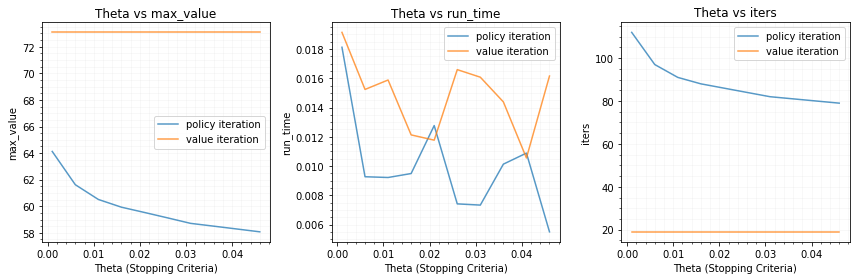

In [40]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=len(cols))
for i, col in enumerate(cols):
    pi_df[col].plot(ax=axes[i], label="policy iteration", alpha=.75)
    vi_df[col].plot(ax=axes[i], label="value iteration", alpha=.75)
    axes[i].set_title("Theta vs {0}".format(col))
    axes[i].legend()
    axes[i].minorticks_on()
    axes[i].grid(b=True, which='major', alpha=0.1)
    axes[i].grid(b=True, which='minor', alpha=0.1)
    axes[i].set_xlabel("Theta (Stopping Criteria)")
    axes[i].set_ylabel("{0}".format(col))
fig.tight_layout()

In [49]:
sizes = np.arange(start=50, stop=750, step=50)

In [50]:
sizes

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700])

In [51]:
pi_frames = []
vi_frames = []
for size in sizes:
    T, R = forest(S=size)
    vi = ValueIteration(T, R, gamma=.99)
    vi.run()
    _frame = pd.DataFrame({"max_value": max(vi.V),
                          "run_time": vi.time,
                          "iters": vi.iter}, index=[size])
    pi_frames.append(_frame)
    pi = PolicyIterationModified(T, R, gamma=.99)
    pi.run()
    _frame = pd.DataFrame({"max_value": max(pi.V),
                          "run_time": pi.time,
                          "iters": pi.iter}, index=[size])
    vi_frames.append(_frame)
pi_df = pd.concat(pi_frames)
vi_df = pd.concat(vi_frames)

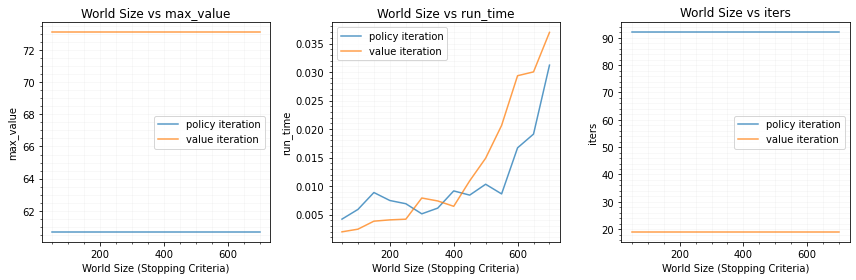

In [52]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=len(cols))
for i, col in enumerate(cols):
    pi_df[col].plot(ax=axes[i], label="policy iteration", alpha=.75)
    vi_df[col].plot(ax=axes[i], label="value iteration", alpha=.75)
    axes[i].set_title("World Size vs {0}".format(col))
    axes[i].legend()
    axes[i].minorticks_on()
    axes[i].grid(b=True, which='major', alpha=0.1)
    axes[i].grid(b=True, which='minor', alpha=0.1)
    axes[i].set_xlabel("World Size (Stopping Criteria)")
    axes[i].set_ylabel("{0}".format(col))
fig.tight_layout()

In [59]:
q_frames = []
for gamma in gammas:
    ql = QLearning(T, R, gamma)
    ql.run()
    _frame = pd.DataFrame({"max_value": max(ql.V),
                          "run_time": ql.time}, index=[gamma])
    q_frames.append(_frame)
q_df = pd.concat(q_frames)

In [61]:
cols = q_df.columns

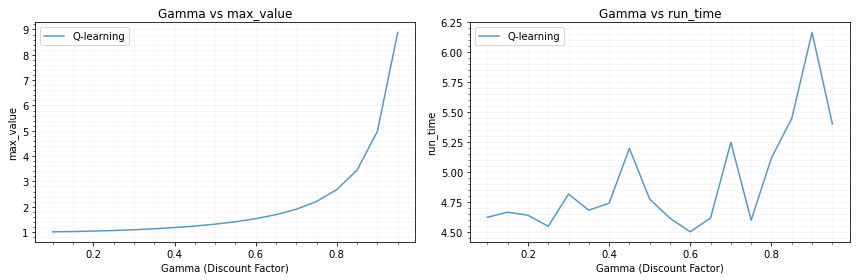

In [62]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=len(cols))
for i, col in enumerate(cols):
    q_df[col].plot(ax=axes[i], label="Q-learning", alpha=.75)
    axes[i].set_title("Gamma vs {0}".format(col))
    axes[i].legend()
    axes[i].minorticks_on()
    axes[i].grid(b=True, which='major', alpha=0.1)
    axes[i].grid(b=True, which='minor', alpha=0.1)
    axes[i].set_xlabel("Gamma (Discount Factor)")
    axes[i].set_ylabel("{0}".format(col))
fig.tight_layout()

In [66]:
iters = np.arange(10000, 100000, 10000)

In [67]:
from tqdm import tqdm

In [72]:
q_frames = []
for i in tqdm(iters):
    ql = QLearning(T, R, gamma=.99, n_iter=i)
    ql.run()
    _frame = pd.DataFrame({"max_value": max(ql.V),
                          "run_time": ql.time}, index=[i])
    q_frames.append(_frame)
q_df = pd.concat(q_frames)

100%|██████████| 9/9 [00:21<00:00,  2.43s/it]


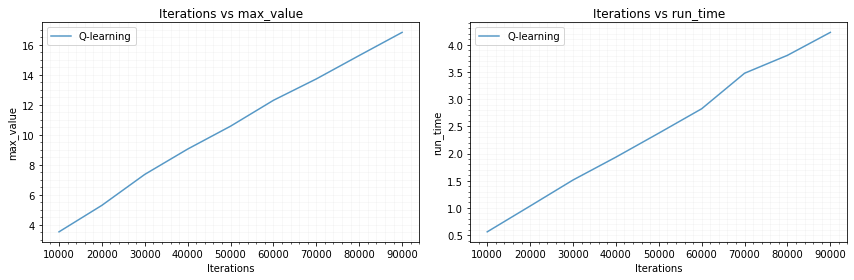

In [79]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=len(cols))
for i, col in enumerate(cols):
    q_df[col].plot(ax=axes[i], label="Q-learning", alpha=.75)
    axes[i].set_title("Iterations vs {0}".format(col))
    axes[i].legend()
    axes[i].minorticks_on()
    axes[i].grid(b=True, which='major', alpha=0.1)
    axes[i].grid(b=True, which='minor', alpha=0.1)
    axes[i].set_xlabel("Iterations")
    axes[i].set_ylabel("{0}".format(col))
fig.tight_layout()

In [565]:
import seaborn as sns

In [568]:
vi_V = np.array(vi.V)

In [577]:
vi_P = np.array(pi.V)

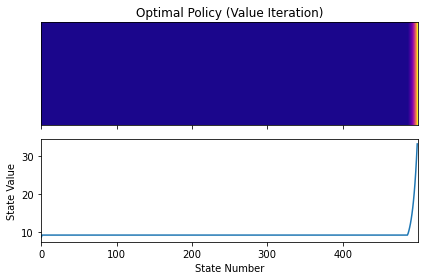

In [591]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
plt.rcParams["figure.figsize"] = 5,2

x = np.arange(0, 500, 1)
y = vi_V

fig, (ax,ax2) = plt.subplots(figsize=(6,4), nrows=2, sharex=True)

extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])
ax2.set_xlabel("State Number")
ax2.set_ylabel("State Value")
ax2.plot(x,y)
ax.set_title("Optimal Policy (Value Iteration)")
plt.tight_layout()
plt.show()

In [594]:
np.array(vi.policy) == np.array(pi.policy)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

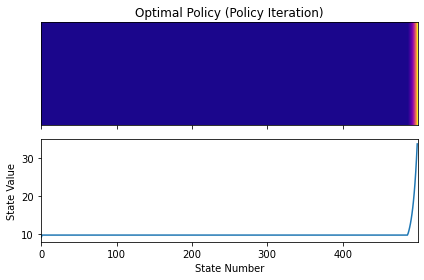

In [592]:
x = np.arange(0, 500, 1)
y = vi_P

fig, (ax,ax2) = plt.subplots(figsize=(6,4), nrows=2, sharex=True)

extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])
ax2.set_xlabel("State Number")
ax2.set_ylabel("State Value")
ax2.plot(x,y)
ax.set_title("Optimal Policy (Policy Iteration)")
plt.tight_layout()
plt.show()

In [583]:
vi.policy

(0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [579]:
vi_V == vi_P

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [462]:
ql = QLearning(T, R, .95, n_iter=1000000)
ql.run(.01)

In [467]:
vi = ValueIteration(T, R, .95)
pi = PolicyIteration(T, R, .95)

In [469]:
vi.V

(8.734755845884466,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,
 9.273778353122959,


In [470]:
pi.V

(9.218328840970186,
 9.757412398921677,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,
 9.757412398921675,


In [468]:
vi.run()
pi.run()

[{'State': None,
  'Action': None,
  'Reward': 33.62580165442884,
  'Error': 19.86838925550702,
  'Time': 0.5849976539611816,
  'Max V': 33.62580165442884,
  'Mean V': 9.80407101031693,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 33.625801654428834,
  'Error': 16.448389255507003,
  'Time': 1.4520471096038818,
  'Max V': 33.625801654428834,
  'Mean V': 9.843807788827961,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 33.62580165442882,
  'Error': 13.52428925550702,
  'Time': 2.261781930923462,
  'Max V': 33.62580165442882,
  'Mean V': 9.876704567338939,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 33.62580165442879,
  'Error': 11.024183755507002,
  'Time': 2.975348949432373,
  'Max V': 33.62580165442879,
  'Mean V': 9.90375314584995,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 33.62580165442879,
  'Error': 8.886593553007009,
  'Time': 3.603872537612915,
  'Max V': 33.62580165442879,
  'Mean V': 9.9258015

In [464]:
ql.V

(9.231327243997548,
 9.767069444129632,
 9.767202613919803,
 9.767518376215707,
 9.767436475041332,
 9.764471099358422,
 9.591659837171468,
 8.022722238656067,
 5.0325565924774835,
 2.8488815306543627,
 1.5338928661857851,
 0.7775319754904706,
 1.0921749413961575,
 0.40535555267938794,
 0.4212286120840079,
 0.16849099468485218,
 0.27081691752647735,
 0.4406445031107534,
 0.5667912151930602,
 0.2623408623070125,
 0.26945458247274334,
 0.24619343258154172,
 0.2505852653254968,
 0.30225599717877477,
 0.2874712134607308,
 0.307461324772672,
 0.38857297238493643,
 0.22795373351708678,
 0.25207016003361843,
 0.3579626440061235,
 0.355969834827854,
 0.22833517288991043,
 0.311879908146329,
 0.17703532400701733,
 0.2951079479039604,
 0.34054539557466973,
 0.31872486788654303,
 0.32333717014872365,
 0.3553508498134705,
 0.2825112546740032,
 0.3311191677740004,
 0.3450688121687449,
 0.36343374632875414,
 0.4857487271476476,
 0.22165248359546666,
 0.29043929483465064,
 0.4506351305461638,
 0.2660

In [342]:
def q_learning(ep, gamma, alpha, eps, steps):
    e_delta = (eps - 0) / steps
    eps = eps - e_delta
    Q = defaultdict(float)  # default zero for all, terminal MUST be zero
    start_time = time.time()
    for _ in range(ep):
        S = 0
        for _ in range(0, steps):
            if np.random.rand() > eps:
                A = argmax_rand([Q[S, a] for a in range(2)])
            else:
                A = np.random.choice(list(range(2)))
            S_prime, _R = step(A, S)
            max_Q = np.max([Q[S_prime, a] for a in range(2)])
            Q[S, A] = Q[S,A] + alpha * (_R + gamma * max_Q - Q[S,A])
            S = S_prime
    run_time = time.time() - start_time
    return Q, run_time

In [351]:
import time

In [515]:
def step(A, S):
    probs = T[A, S]
    S_prime = np.random.choice(range(len(probs)), p=probs)
    _R = R[S, A]
    return S_prime, _R

In [604]:
T, R = forest(S=500)

In [611]:
def q_learning(episodes, gamma, alpha, beta, iters):
    Q = defaultdict(float)
    Q_t = defaultdict(float)
    N = defaultdict(float)
    start_time = time.time()
    for _ in tqdm(range(episodes)):
        S = 0
        t = 0
        max_S = 0
        while t <= iters:
            t += 1
            if t % 10000 == 0:
                print(max_S)
            A = np.argmax([Q_t[t, S, a] + beta*np.sqrt((np.log(t+1))/(2*N[t, S, a])) for a in range(2)])
            S_prime, _R = step(A, S)
            max_Q = np.max([Q[S_prime, a] for a in range(2)])
            Q[S, A] = Q[S,A] + alpha * (_R + gamma * max_Q - Q[S,A])
            N[t, S, A] += 1
            Q_t[t, S, A] = Q[S, A] / N[t, S, A]
            if S_prime > S:
                max_S = S_prime
            S = S_prime
            if S == 499:
                break
    run_time = time.time() - start_time
    return Q, Q_t, N, run_time

In [623]:
 Q, Q_t, N, run_time = q_learning(100, .99, .5, 1, 10000)

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-611-3c4707999018>:14: RuntimeWarning: divide by zero encountered in double_scalars
  A = np.argmax([Q_t[t, S, a] + beta*np.sqrt((np.log(t+1))/(2*N[t, S, a])) for a in range(2)])
  1%|          | 1/100 [00:01<02:00,  1.21s/it]

31


  2%|▏         | 2/100 [00:02<01:54,  1.17s/it]

2


  3%|▎         | 3/100 [00:03<01:50,  1.14s/it]

20


  4%|▍         | 4/100 [00:04<01:48,  1.13s/it]

35


  5%|▌         | 5/100 [00:05<01:46,  1.12s/it]

5


  6%|▌         | 6/100 [00:06<01:44,  1.11s/it]

3


  7%|▋         | 7/100 [00:07<01:41,  1.10s/it]

1


  8%|▊         | 8/100 [00:08<01:40,  1.09s/it]

19


  9%|▉         | 9/100 [00:09<01:38,  1.08s/it]

4


 10%|█         | 10/100 [00:11<01:37,  1.09s/it]

6


 11%|█         | 11/100 [00:12<01:36,  1.08s/it]

14


 12%|█▏        | 12/100 [00:13<01:34,  1.08s/it]

5


 13%|█▎        | 13/100 [00:14<01:33,  1.07s/it]

12


 14%|█▍        | 14/100 [00:15<01:32,  1.07s/it]

9


 15%|█▌        | 15/100 [00:16<01:31,  1.08s/it]

1


 16%|█▌        | 16/100 [00:17<01:30,  1.08s/it]

7


 17%|█▋        | 17/100 [00:18<01:29,  1.07s/it]

1


 18%|█▊        | 18/100 [00:19<01:28,  1.07s/it]

1


 19%|█▉        | 19/100 [00:20<01:26,  1.07s/it]

1


 20%|██        | 20/100 [00:21<01:25,  1.07s/it]

1


 21%|██        | 21/100 [00:22<01:23,  1.06s/it]

1


 22%|██▏       | 22/100 [00:23<01:23,  1.07s/it]

1


 23%|██▎       | 23/100 [00:24<01:22,  1.08s/it]

8


 24%|██▍       | 24/100 [00:26<01:21,  1.07s/it]

2


 25%|██▌       | 25/100 [00:27<01:20,  1.08s/it]

1


 26%|██▌       | 26/100 [00:28<01:19,  1.07s/it]

2


 27%|██▋       | 27/100 [00:29<01:17,  1.07s/it]

1


 28%|██▊       | 28/100 [00:30<01:16,  1.07s/it]

2


 29%|██▉       | 29/100 [00:31<01:15,  1.07s/it]

1


 30%|███       | 30/100 [00:32<01:14,  1.07s/it]

1


 31%|███       | 31/100 [00:33<01:13,  1.06s/it]

1


 32%|███▏      | 32/100 [00:34<01:12,  1.06s/it]

1


 33%|███▎      | 33/100 [00:35<01:10,  1.06s/it]

2


 34%|███▍      | 34/100 [00:36<01:09,  1.05s/it]

1


 35%|███▌      | 35/100 [00:37<01:08,  1.06s/it]

1


 36%|███▌      | 36/100 [00:38<01:07,  1.06s/it]

1


 37%|███▋      | 37/100 [00:39<01:06,  1.05s/it]

3


 38%|███▊      | 38/100 [00:40<01:06,  1.07s/it]

2


 39%|███▉      | 39/100 [00:42<01:05,  1.08s/it]

1


 40%|████      | 40/100 [00:43<01:04,  1.07s/it]

1


 41%|████      | 41/100 [00:44<01:02,  1.06s/it]

1


 42%|████▏     | 42/100 [00:45<01:01,  1.06s/it]

1


 43%|████▎     | 43/100 [00:46<01:00,  1.05s/it]

2


 44%|████▍     | 44/100 [00:47<00:59,  1.06s/it]

1


 45%|████▌     | 45/100 [00:48<00:57,  1.05s/it]

2


 46%|████▌     | 46/100 [00:49<00:57,  1.06s/it]

3


 47%|████▋     | 47/100 [00:50<00:55,  1.05s/it]

1


 48%|████▊     | 48/100 [00:51<00:54,  1.05s/it]

2


 49%|████▉     | 49/100 [00:52<00:53,  1.05s/it]

1


 50%|█████     | 50/100 [00:53<00:52,  1.06s/it]

1


 51%|█████     | 51/100 [00:54<00:51,  1.06s/it]

1


 52%|█████▏    | 52/100 [00:55<00:50,  1.05s/it]

2


 53%|█████▎    | 53/100 [00:56<00:49,  1.05s/it]

3


 54%|█████▍    | 54/100 [00:57<00:49,  1.07s/it]

1


 55%|█████▌    | 55/100 [00:58<00:47,  1.05s/it]

1


 56%|█████▌    | 56/100 [00:59<00:46,  1.05s/it]

1


 57%|█████▋    | 57/100 [01:01<00:45,  1.06s/it]

2


 58%|█████▊    | 58/100 [01:02<00:44,  1.06s/it]

1


 59%|█████▉    | 59/100 [01:03<00:43,  1.07s/it]

1


 60%|██████    | 60/100 [01:04<00:42,  1.06s/it]

1


 61%|██████    | 61/100 [01:05<00:40,  1.05s/it]

3


 62%|██████▏   | 62/100 [01:06<00:40,  1.06s/it]

1


 63%|██████▎   | 63/100 [01:07<00:39,  1.06s/it]

1


 64%|██████▍   | 64/100 [01:08<00:38,  1.07s/it]

1


 65%|██████▌   | 65/100 [01:09<00:37,  1.06s/it]

1


 66%|██████▌   | 66/100 [01:10<00:36,  1.07s/it]

1


 67%|██████▋   | 67/100 [01:11<00:34,  1.06s/it]

1


 68%|██████▊   | 68/100 [01:12<00:34,  1.06s/it]

1


 69%|██████▉   | 69/100 [01:13<00:32,  1.06s/it]

1


 70%|███████   | 70/100 [01:14<00:31,  1.05s/it]

2


 71%|███████   | 71/100 [01:15<00:30,  1.05s/it]

1


 72%|███████▏  | 72/100 [01:16<00:29,  1.05s/it]

1


 73%|███████▎  | 73/100 [01:17<00:28,  1.05s/it]

1


 74%|███████▍  | 74/100 [01:19<00:27,  1.06s/it]

1


 75%|███████▌  | 75/100 [01:20<00:26,  1.05s/it]

2


 76%|███████▌  | 76/100 [01:21<00:25,  1.04s/it]

1


 77%|███████▋  | 77/100 [01:22<00:23,  1.04s/it]

3


 78%|███████▊  | 78/100 [01:23<00:22,  1.04s/it]

1


 79%|███████▉  | 79/100 [01:24<00:21,  1.04s/it]

1


 80%|████████  | 80/100 [01:25<00:20,  1.03s/it]

1


 81%|████████  | 81/100 [01:26<00:19,  1.04s/it]

1


 82%|████████▏ | 82/100 [01:27<00:18,  1.05s/it]

1


 83%|████████▎ | 83/100 [01:28<00:17,  1.05s/it]

2


 84%|████████▍ | 84/100 [01:29<00:16,  1.06s/it]

2


 85%|████████▌ | 85/100 [01:30<00:15,  1.06s/it]

1


 86%|████████▌ | 86/100 [01:31<00:14,  1.05s/it]

1


 87%|████████▋ | 87/100 [01:32<00:13,  1.05s/it]

3


 88%|████████▊ | 88/100 [01:33<00:12,  1.06s/it]

1


 89%|████████▉ | 89/100 [01:34<00:11,  1.05s/it]

1


 90%|█████████ | 90/100 [01:35<00:10,  1.07s/it]

3


 91%|█████████ | 91/100 [01:36<00:09,  1.06s/it]

4


 92%|█████████▏| 92/100 [01:37<00:08,  1.06s/it]

1


 93%|█████████▎| 93/100 [01:38<00:07,  1.06s/it]

4


 94%|█████████▍| 94/100 [01:40<00:06,  1.07s/it]

1


 95%|█████████▌| 95/100 [01:41<00:05,  1.07s/it]

1


 96%|█████████▌| 96/100 [01:42<00:04,  1.07s/it]

1


 97%|█████████▋| 97/100 [01:43<00:03,  1.07s/it]

1


 98%|█████████▊| 98/100 [01:44<00:02,  1.08s/it]

1


 99%|█████████▉| 99/100 [01:45<00:01,  1.07s/it]

1


100%|██████████| 100/100 [01:46<00:00,  1.06s/it]

1


In [622]:
Q

defaultdict(float,
            {(1, 0): 48.14053221520627,
             (1, 1): 48.66511949090072,
             (0, 0): 47.917762142078246,
             (0, 1): 47.550632514143174,
             (2, 0): 48.15527633765373,
             (2, 1): 48.651400958795776,
             (3, 0): 48.188624487153426,
             (3, 1): 48.64126323887429,
             (4, 0): 45.19016924379283,
             (4, 1): 48.6208048686894,
             (5, 0): 44.79015043010409,
             (5, 1): 36.525480084345084,
             (6, 0): 44.25511432081639,
             (6, 1): 0.0,
             (7, 0): 43.46129681847643,
             (7, 1): 0.0,
             (8, 0): 45.57802115159914,
             (8, 1): 0.0,
             (9, 0): 43.15514934659414,
             (9, 1): 0.0,
             (10, 0): 43.0267276861351,
             (10, 1): 0.0,
             (11, 0): 45.78729164558676,
             (11, 1): 0.0,
             (12, 0): 44.92621406970959,
             (12, 1): 0.0,
             (13, 0): 43.05909

In [596]:
V = []
for x in range(100):
    optimal_value = np.max([Q[x, a] for a in [0, 1]])
    V.append(optimal_value)
V = np.array(V)
V = V.reshape(100, -1)

In [597]:
V

array([[48.59807368],
       [49.09702034],
       [49.0739713 ],
       [49.00635413],
       [49.05402293],
       [49.02363297],
       [48.88959512],
       [48.95205001],
       [48.89471787],
       [48.88478976],
       [48.84672756],
       [48.83572096],
       [48.81605911],
       [48.91258026],
       [43.03038735],
       [42.76144563],
       [43.07015662],
       [43.1684002 ],
       [42.75917474],
       [42.97824937],
       [43.84217113],
       [44.25199975],
       [43.74223426],
       [42.46149406],
       [41.77426001],
       [42.45644039],
       [42.96182235],
       [42.54884602],
       [40.89546665],
       [43.70931813],
       [37.43838982],
       [37.3007364 ],
       [36.15200356],
       [32.63856721],
       [29.5762143 ],
       [28.20839903],
       [27.50820856],
       [27.42556195],
       [27.48302746],
       [27.50663577],
       [27.57294864],
       [27.24161795],
       [26.85342948],
       [26.56455209],
       [25.29513456],
       [22

In [490]:
Q = defaultdict(float)

In [522]:
A = 1
S = 1

In [514]:
def step(A, S):
    probs = T[A, S]
    S_prime = np.random.choice(range(len(probs)), p=probs)
    _R = R[S, A]
    return S_prime, _R

In [524]:
Q

defaultdict(float,
            {(1, 0): 0.0,
             (1, 1): 0.0,
             (0, 0): 0.0,
             (2, 0): 0.0,
             (2, 1): 0.0,
             (0, 1): 0.0,
             (3, 0): 0.0,
             (3, 1): 0.0,
             (4, 0): 0.0,
             (4, 1): 0.0,
             (5, 0): 0.0,
             (5, 1): 0.0,
             (6, 0): 0.0,
             (6, 1): 0.0,
             (7, 0): 0.0,
             (7, 1): 0.0,
             (8, 0): 0.0,
             (8, 1): 0.0,
             (9, 0): 0.0,
             (9, 1): 0.0,
             (10, 0): 0.0,
             (10, 1): 0.0,
             (11, 0): 0.0,
             (11, 1): 0.0,
             (12, 0): 0.0,
             (12, 1): 0.0,
             (13, 0): 0.0,
             (13, 1): 0.0,
             (14, 0): 0.0,
             (14, 1): 0.0,
             (15, 0): 0.0,
             (15, 1): 0.0,
             (16, 0): 0.0,
             (16, 1): 0.0,
             (17, 0): 0.0,
             (17, 1): 0.0,
             (18, 0): 0.0,
  

In [442]:
def ucb(beta):
    return [np.sqrt((beta*np.log(t+1))/(2*t)) for t in range(1, 100)]
    

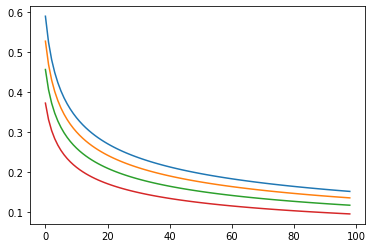

In [443]:
plt.plot(ucb(1))
plt.plot(ucb(.8))
plt.plot(ucb(.6))
plt.plot(ucb(.4))

In [434]:
np.arange(.1, 1, .1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])